In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [2]:
folderpath = os.path.dirname(r'C:\Users\visan\Downloads\days_test\\')
zenith_file_name = '??????_K.NO2_vis'
horizon_file_name = '??????KK.NO2_vis_sync'
zenith_filepaths = glob.glob(os.path.join(folderpath,zenith_file_name))
horizon_filepaths = glob.glob(os.path.join(folderpath,horizon_file_name))

print(zenith_filepaths)
print(horizon_filepaths)


['C:\\Users\\visan\\Downloads\\days_test\\200205_K.NO2_Vis', 'C:\\Users\\visan\\Downloads\\days_test\\200322_K.NO2_Vis', 'C:\\Users\\visan\\Downloads\\days_test\\200323_K.NO2_Vis', 'C:\\Users\\visan\\Downloads\\days_test\\200331_K.NO2_Vis', 'C:\\Users\\visan\\Downloads\\days_test\\200416_K.NO2_Vis', 'C:\\Users\\visan\\Downloads\\days_test\\200426_K.NO2_Vis', 'C:\\Users\\visan\\Downloads\\days_test\\200508_K.NO2_Vis', 'C:\\Users\\visan\\Downloads\\days_test\\200520_K.NO2_Vis', 'C:\\Users\\visan\\Downloads\\days_test\\200716_K.NO2_Vis', 'C:\\Users\\visan\\Downloads\\days_test\\200803_K.NO2_Vis', 'C:\\Users\\visan\\Downloads\\days_test\\200922_K.NO2_Vis']
['C:\\Users\\visan\\Downloads\\days_test\\200205KK.NO2_Vis_sync', 'C:\\Users\\visan\\Downloads\\days_test\\200322KK.NO2_Vis_sync', 'C:\\Users\\visan\\Downloads\\days_test\\200323KK.NO2_Vis_sync', 'C:\\Users\\visan\\Downloads\\days_test\\200331KK.NO2_Vis_sync', 'C:\\Users\\visan\\Downloads\\days_test\\200416KK.NO2_Vis_sync', 'C:\\Users\\v

In [3]:
horizon_filepaths[-1]

'C:\\Users\\visan\\Downloads\\days_test\\200922KK.NO2_Vis_sync'

In [4]:
horizon_data = pd.read_csv(horizon_filepaths[-1],usecols=[1,6,13,15,19,33], sep ='\s+',  header = 63)

In [5]:
TIME = horizon_data['time'];
NO2 = horizon_data['a[NO2]'];
VAA = horizon_data['viewing-azimuth-angle']
O4 = horizon_data['a[O4]']
H2O = horizon_data['a[H2O]']

### Calculating RMS and Standard Deviation

In [6]:
import math


In [7]:
NOx = np.array([NO2])  
#print("Root Mean Square Error NO2:",np.sqrt(np.mean(NOx**2)))
print("std of NO2 : ", np.std(NOx))



std of NO2 :  6.336749644917595e+16


In [8]:
Oxy = np.array([O4])  
#print("Root Mean Square Error NO2:",np.sqrt(np.mean(Oxy**2)))
print("std of O4 : ", np.std(Oxy))


std of O4 :  1437.205511765566


In [9]:
hydro = np.array([H2O])  
#print("Root Mean Square Error NO2:",np.sqrt(np.mean(hydro**2)))
print("std of H2O : ", np.std(hydro))

std of H2O :  4.316383049948883e+22


In [10]:
VAA = horizon_data['viewing-azimuth-angle']

In [19]:
O4 =  horizon_data['a[O4]']
o4 = O4*1e40

In [21]:
O4_corr = o4.copy();
H2O_corr = horizon_data['a[H2O]'].copy();
#NO2_corr = horizon_data['a[NO2]'].copy();

# the xx_scan variables contain all values fro one azimuthal scan (24 values)
O4_scan = np.zeros(24);
O4_corr_scan = np.zeros(24);

# the xx_RMS variables contain the RMS for each scan; size = number of measurements // 24
O4_RMS = np.zeros(horizon_data.shape[0]//24);
O4_corr_RMS = np.zeros(horizon_data.shape[0]//24);
time_RMS = np.zeros(horizon_data.shape[0]//24);

# scan is the counter for the scans, pp the counter for the position within one scan
scan = 0;
pp = 0;

for i in range (0,horizon_data.shape[0]):
    if(VAA[i] == 130):
        norm_value=horizon_data['a[H2O]'][i]; 
        pp = 0;
    
    H2O_corr[i]=horizon_data['a[H2O]'][i] / norm_value;  
    #NO2_corr[i]=horizon_data['a[NO2]'][i] / H2O_corr[i]; 
    O4_corr[i]=o4[i]   / H2O_corr[i]; 

    # add data point to current scan
    O4_scan[pp] = o4[i];
    O4_corr_scan[pp] = O4_corr[i];
    pp = pp + 1;
    
    # if end of scan: compute RMS of scan, move on to next scan
    if(VAA[i] == 360):
        O4_RMS[scan] = np.std(O4_scan, dtype=np.float64);
        O4_corr_RMS[scan] = np.std(O4_corr_scan, dtype=np.float64);
        time_RMS[scan] = horizon_data['time'][i];
        scan = scan + 1; 
    

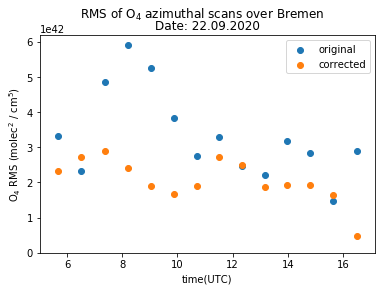

In [23]:
plt.scatter(time_RMS, O4_RMS, label='original')
plt.scatter(time_RMS, O4_corr_RMS, label='corrected')
plt.suptitle('RMS of O$_4$ azimuthal scans over Bremen')
plt.title(('Date: 22.09.2020'))
plt.xlabel('time(UTC)') 
plt.ylabel('O$_4$ RMS (molec$^2$ / cm$^5$)')
plt.legend()
plt.ylim(bottom=0)
plt.show()

In [17]:
#O4_corr = horizon_data['a[O4]'].copy();
H2O_corr = horizon_data['a[H2O]'].copy();
NO2_corr = horizon_data['a[NO2]'].copy();

# the xx_scan variables contain all values fro one azimuthal scan (24 values)
NO2_scan = np.zeros(24);
NO2_corr_scan = np.zeros(24);

# the xx_RMS variables contain the RMS for each scan; size = number of measurements // 24
NO2_RMS = np.zeros(horizon_data.shape[0]//24);
NO2_corr_RMS = np.zeros(horizon_data.shape[0]//24);
time_RMS = np.zeros(horizon_data.shape[0]//24);

# scan is the counter for the scans, pp the counter for the position within one scan
scan = 0;
pp = 0;

for i in range (0,horizon_data.shape[0]):
    if(VAA[i] == 130):
        norm_value=horizon_data['a[H2O]'][i]; 
        pp = 0;
    
    H2O_corr[i]=horizon_data['a[H2O]'][i] / norm_value;  
    NO2_corr[i]=horizon_data['a[NO2]'][i] / H2O_corr[i]; 
    #O4_corr[i]=horizon_data['a[O4]'][i]   / H2O_corr[i]; 

    # add data point to current scan
    NO2_scan[pp] = horizon_data['a[NO2]'][i];
    NO2_corr_scan[pp] = NO2_corr[i];
    pp = pp + 1;
    
    # if end of scan: compute RMS of scan, move on to next scan
    if(VAA[i] == 360):
        NO2_RMS[scan] = np.std(NO2_scan, dtype=np.float64);
        NO2_corr_RMS[scan] = np.std(NO2_corr_scan, dtype=np.float64);
        time_RMS[scan] = horizon_data['time'][i];
        scan = scan + 1; 

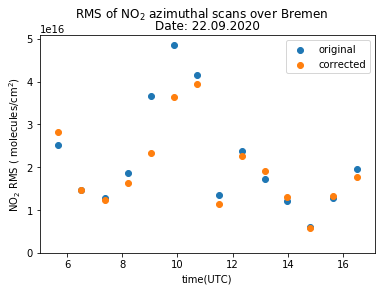

In [18]:
plt.scatter(time_RMS, NO2_RMS, label='original')
plt.scatter(time_RMS, NO2_corr_RMS, label='corrected')
plt.suptitle('RMS of NO$_2$ azimuthal scans over Bremen')
plt.title(('Date: 22.09.2020'))
plt.xlabel('time(UTC)') 
plt.ylabel('NO$_2$ RMS ( molecules/cm$^2$)')
plt.legend()
plt.ylim(bottom=0)
plt.show()

### time series of NO2 with normalized O4

In [48]:
O4_corr = horizon_data['a[O4]'].copy();
#H2O_corr = horizon_data['a[H2O]'].copy();
NO2_corr = horizon_data['a[NO2]'].copy();

# the xx_scan variables contain all values fro one azimuthal scan (24 values)
NO2_scan = np.zeros(24);
NO2_corr_scan = np.zeros(24);

# the xx_RMS variables contain the RMS for each scan; size = number of measurements // 24
NO2_RMS = np.zeros(horizon_data.shape[0]//24);
NO2_corr_RMS = np.zeros(horizon_data.shape[0]//24);
time_RMS = np.zeros(horizon_data.shape[0]//24);

# scan is the counter for the scans, pp the counter for the position within one scan
scan = 0;
pp = 0;

for i in range (0,horizon_data.shape[0]):
    if(VAA[i] == 130):
        norm_value=horizon_data['a[O4]'][i]; 
        pp = 0;
    
    #H2O_corr[i]=horizon_data['a[H2O]'][i] / norm_value;  
    NO2_corr[i]=horizon_data['a[NO2]'][i] / O4_corr[i]; 
    #O4_corr[i]=horizon_data['a[O4]'][i]   / O4_corr[i]; 

    # add data point to current scan
    NO2_scan[pp] = horizon_data['a[NO2]'][i];
    NO2_corr_scan[pp] = NO2_corr[i];
    pp = pp + 1;
    
    # if end of scan: compute RMS of scan, move on to next scan
    if(VAA[i] == 360):
        NO2_RMS[scan] = np.std(NO2_scan, dtype=np.float64);
        NO2_corr_RMS[scan] = np.std(NO2_corr_scan, dtype=np.float64);
        time_RMS[scan] = horizon_data['time'][i];
        scan = scan + 1; 

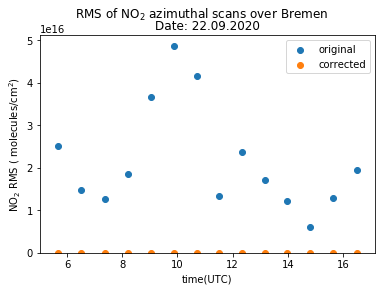

In [49]:
plt.scatter(time_RMS, NO2_RMS, label='original')
plt.scatter(time_RMS, NO2_corr_RMS, label='corrected')
plt.suptitle('RMS of NO$_2$ azimuthal scans over Bremen')
plt.title(('Date: 22.09.2020'))
plt.xlabel('time(UTC)') 
plt.ylabel('NO$_2$ RMS ( molecules/cm$^2$)')
plt.legend()
plt.ylim(bottom=0)
plt.show()